## Context 

- We will be examining the performance in *trial* vs *control stores* to provide a recommendation for each location based on our insight.

- Select control stores – explore the data and define metrics for control store selection – "What would make them a control store?" Visualize the drivers to see suitability.

- Assessment of the trial – get insights of each of the stores. Compare each trial store with control store to get its overall performance. We want to know if the trial stores were successful or not. 
 
- Collate findings – summarise findings for each store and provide recommendations to share with client outlining the impact on sales during trial period.

- Create a measure to compare different control stores to each of the trial stores to do this write a function to reduce having to re-do the analysis for each trial store. Consider using Pearson correlations or a metric such as a magnitude distance e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure.

- Trial period start from February to the end of April 2019.
- Trial Store are 77,86,88.
- check for 237 control store instead of 178

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from scipy.stats import t 
from statistics import stdev

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [208]:
df = pd.read_csv("/content/sample_data/QVI_data.csv")
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [209]:
df.shape

(264834, 12)

In [210]:
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [211]:
df= df.rename(columns={"PREMIUM_CUSTOMER":"MEMBER_TYPE"})

In [212]:
df= df.rename(columns={"TOT_SALES":"TOTAL_SALES"})

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LYLTY_CARD_NBR  264834 non-null  int64  
 1   DATE            264834 non-null  object 
 2   STORE_NBR       264834 non-null  int64  
 3   TXN_ID          264834 non-null  int64  
 4   PROD_NBR        264834 non-null  int64  
 5   PROD_NAME       264834 non-null  object 
 6   PROD_QTY        264834 non-null  int64  
 7   TOTAL_SALES     264834 non-null  float64
 8   PACK_SIZE       264834 non-null  int64  
 9   BRAND           264834 non-null  object 
 10  LIFESTAGE       264834 non-null  object 
 11  MEMBER_TYPE     264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [214]:
# Change DATE column into int datatype
df["DATE"] = pd.to_datetime(df["DATE"])
df["YEARMONTH"] = df["DATE"].dt.strftime("%Y%m")
df["YEARMONTH"] = pd.to_numeric(df["YEARMONTH"] )

## We calculate these variables for each store number and month:

- total sales revenue
- total number of customers
- average number of transactions per customer

In [215]:
# Total sales per each store number and month
total_sales = df.groupby(["STORE_NBR","YEARMONTH"]).TOTAL_SALES.sum()
total_sales

STORE_NBR  YEARMONTH
1          201807       206.9
           201808       176.1
           201809       278.8
           201810       188.1
           201811       192.6
                        ...  
272        201902       395.5
           201903       442.3
           201904       445.1
           201905       314.6
           201906       312.1
Name: TOTAL_SALES, Length: 3169, dtype: float64

In [216]:
# Total unigue loyalty customer per each store number and month
num_customer = df.groupby(["STORE_NBR","YEARMONTH"]).LYLTY_CARD_NBR.nunique()
num_customer

STORE_NBR  YEARMONTH
1          201807       49
           201808       42
           201809       59
           201810       44
           201811       46
                        ..
272        201902       45
           201903       50
           201904       54
           201905       34
           201906       34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [217]:
# Total number transaction per customer for each store and month
nTxnPerCustomer =   df.groupby(["STORE_NBR","YEARMONTH"]).TXN_ID.nunique()/df.groupby(["STORE_NBR","YEARMONTH"]).LYLTY_CARD_NBR.nunique()
nTxnPerCustomer

STORE_NBR  YEARMONTH
1          201807       1.061224
           201808       1.023810
           201809       1.050847
           201810       1.022727
           201811       1.021739
                          ...   
272        201902       1.066667
           201903       1.060000
           201904       1.018519
           201905       1.176471
           201906       1.088235
Length: 3169, dtype: float64

In [218]:
# Total of chips per customer for each month and store
nChipePerTxn =  df.groupby(["STORE_NBR","YEARMONTH"]).PROD_QTY.sum()/ df.groupby(["STORE_NBR","YEARMONTH"]).TXN_ID.nunique()
nChipePerTxn

STORE_NBR  YEARMONTH
1          201807       1.192308
           201808       1.255814
           201809       1.209677
           201810       1.288889
           201811       1.212766
                          ...   
272        201902       1.895833
           201903       1.905660
           201904       1.909091
           201905       1.775000
           201906       1.891892
Length: 3169, dtype: float64

In [219]:
# Average price per unit for each month and store
avgPricePerUnit = df.groupby(["STORE_NBR","YEARMONTH"]).TOTAL_SALES.sum()/df.groupby(["STORE_NBR","YEARMONTH"]).PROD_QTY.sum()
avgPricePerUnit

STORE_NBR  YEARMONTH
1          201807       3.337097
           201808       3.261111
           201809       3.717333
           201810       3.243103
           201811       3.378947
                          ...   
272        201902       4.346154
           201903       4.379208
           201904       4.239048
           201905       4.430986
           201906       4.458571
Length: 3169, dtype: float64

In [220]:
# join all the metrics 
df_metrics = pd.concat([total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit],axis=1)
df_metrics.columns = ['total_sales', 'num_customer', 'nTxnPerCustomer', 'nChipePerTxn', 'avgPricePerUnit']
df_metrics = df_metrics.reset_index()
df_metrics.head()

,STORE_NBR,YEARMONTH,total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [221]:
# Filter to select the stores with full observation periods 
month_counts = df_metrics.groupby('STORE_NBR').YEARMONTH.nunique().reset_index()
stores_fullperiod = month_counts[month_counts.YEARMONTH ==12].STORE_NBR
pretrial_metrics = df_metrics[df_metrics['STORE_NBR'].isin(stores_fullperiod)]

# Then filter to keep only the pre-trial period data
pretrial_metrics = pretrial_metrics.loc[pretrial_metrics.YEARMONTH < 201902]
pretrial_metrics

,STORE_NBR,YEARMONTH,total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549
3160,272,201810,430.6,44,1.136364,1.980000,4.349495
3161,272,201811,376.2,41,1.097561,1.933333,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


In [222]:
# Write a function to calculate the correlation between a trial store and control stores 
def calculateCorrelation(metric_col,trial_store,df=pretrial_metrics):
  output = pd.DataFrame({"trial_store":[],"control_store":[],"Correlation":[]})
  trial_num = df[df["STORE_NBR"]==trial_store][metric_col].reset_index(drop=True)
  storeNumbers = df["STORE_NBR"].unique()
  for i in storeNumbers:
    store_num = df[df["STORE_NBR"]==i][metric_col].reset_index(drop=True)
    output = output.append({"trial_store": trial_store, "control_store":i,"Correlation":store_num.corr(trial_num)},ignore_index=True)
  return output

In [223]:
# Write a function to calculate the magnitude between a trial store and control stores 
# magnitude distance e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance)
def calculateMagnitudeDistance(metric_col, trial_store,df=pretrial_metrics):
  output = pd.DataFrame({"trial_Store":[],"control_store":[],"Magnitude":[]})
  trial_num = df[df['STORE_NBR'] == trial_store][metric_col].reset_index(drop=True)
  storeNumbers = df["STORE_NBR"].unique()
  for i in storeNumbers:
    store_num = df[df["STORE_NBR"]==i][metric_col].reset_index(drop=True)
    standardized = abs(trial_num-store_num)
    magnitude = np.mean(1-(standardized-min(standardized))/(max(standardized)-min(standardized)))
    output = output.append({'trial_Store': trial_store, 'control_store': i, 'Magnitude': magnitude}, ignore_index = True)
  return output

we can also calculate a standardised metric based on the absolute difference between the trial store's performance and each control store's performance

## Trial Store 77 and Control Store

In [224]:
trial_store = 77
corr_total_sales = calculateCorrelation("total_sales",trial_store)
corr_num_customers = calculateCorrelation('num_customer', trial_store)

magnitude_total_sales = calculateMagnitudeDistance("total_sales",trial_store)
magnitude_num_customers = calculateMagnitudeDistance("num_customer",trial_store)


In [225]:
corr_total_sales.head()

,trial_store,control_store,Correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652


In [226]:
magnitude_total_sales.head()

,trial_Store,control_store,Magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320


In [227]:
# Concatenate the scores together for 'total_sales'
score_total_sales = pd.concat([corr_total_sales, magnitude_total_sales['Magnitude']], axis = 1)

In [228]:
# Add a weighted average column 
corr_weight = 0.5
score_total_sales['score_total_sales'] = corr_weight * score_total_sales['Correlation'] + (1 - corr_weight) * score_total_sales['Magnitude']
score_total_sales.head()

,trial_store,control_store,Correlation,Magnitude,score_total_sales
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


In [229]:
# Now do the same for 'nCustomers'
score_num_customers = pd.concat([corr_num_customers, magnitude_num_customers['Magnitude']], axis = 1)
score_num_customers.head()

,trial_store,control_store,Correlation,Magnitude
0,77.0,1.0,0.322168,0.663866
1,77.0,2.0,-0.572051,0.471429
2,77.0,3.0,0.834207,0.489796
3,77.0,4.0,-0.295639,0.498258
4,77.0,5.0,0.370659,0.512605


In [230]:
# Again add a new column for weighted average
score_num_customers['score_num_cust'] = corr_weight * score_num_customers['Correlation'] + (1 - corr_weight) * score_num_customers['Magnitude']
score_num_customers.head()

,trial_store,control_store,Correlation,Magnitude,score_num_cust
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


In [231]:
# Index both 'score_total_sales' and 'score_num_cust' dataframe
score_total_sales.set_index(['trial_store', 'control_store'], inplace = True)
score_num_customers.set_index(['trial_store', 'control_store'], inplace = True)

In [232]:
# Create a new dataframe 'score_Control' which takes the average of 'score_total_sales' and 'score_num_cust'
score_Control = pd.concat([score_total_sales['score_total_sales'], score_num_customers['score_num_cust']], axis = 1)
score_Control

score_total_sales  score_num_cust
trial_store control_store                                   
77.0        1.0                     0.241691        0.493017
            2.0                     0.163520       -0.050311
            3.0                     0.664779        0.662002
            4.0                     0.190817        0.101310
            5.0                     0.202834        0.441632
...                                      ...             ...
            268.0                   0.387272        0.470473
            269.0                   0.121684        0.005090
            270.0                   0.453489        0.202710
            271.0                   0.348289        0.174100
            272.0                   0.320626        0.384336

[260 rows x 2 columns]

In [233]:
# Add a new column to 'score_Control' which computes the average of 'scoreNSales' and 'scoreNCust'
score_Control['finalControlScore'] = 0.5 * (score_Control['score_total_sales'] + score_Control['score_num_cust'])
score_Control.head()

score_total_sales  score_num_cust  finalControlScore
trial_store control_store                                                      
77.0        1.0                     0.241691        0.493017           0.367354
            2.0                     0.163520       -0.050311           0.056604
            3.0                     0.664779        0.662002           0.663390
            4.0                     0.190817        0.101310           0.146064
            5.0                     0.202834        0.441632           0.322233

In [234]:
# top 5 stores with highest finalControlScore
top_5_finalControlSCore = score_Control.sort_values("finalControlScore",ascending=False)
top_5_finalControlSCore.head()

score_total_sales  score_num_cust  finalControlScore
trial_store control_store                                                      
77.0        233.0                   0.697290        0.816607           0.756949
            71.0                    0.789497        0.663123           0.726310
            84.0                    0.656972        0.715000           0.685986
            119.0                   0.636046        0.729729           0.682887
            115.0                   0.708347        0.645155           0.676751

In [235]:
#divide three categories of control store,trial store and other types 
sales_df = pretrial_metrics
control_Store =233
store_type = []
options = {trial_store: "Trial Stores",control_Store: "Control Stores", }

for i in sales_df["STORE_NBR"]:
    the_thing = options.get(i, "Other Stores")
    store_type.append(the_thing)

sales_df["store_type"] = store_type
sales_df.head()

,STORE_NBR,YEARMONTH,total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores


In [236]:
## Check unique store_type column
sales_df["store_type"].unique()

array(['Other Stores', 'Trial Stores', 'Control Stores'], dtype=object)

In [237]:
#check datatype for YEARMONTH
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        1820 non-null   int64  
 1   YEARMONTH        1820 non-null   int64  
 2   total_sales      1820 non-null   float64
 3   num_customer     1820 non-null   int64  
 4   nTxnPerCustomer  1820 non-null   float64
 5   nChipePerTxn     1820 non-null   float64
 6   avgPricePerUnit  1820 non-null   float64
 7   store_type       1820 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 128.0+ KB


In [238]:
#change YEARMONTH to datetime
sales_df["plotMONTH"] = pd.to_datetime(sales_df["YEARMONTH"].astype(str), format = '%Y%m')
sales_df.head()

,STORE_NBR,YEARMONTH,total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit,store_type,plotMONTH
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [239]:
def create_plot(df,metric_col,control_stores,trial_stores,other_stores):
  controlSalesPlot = df.loc[df["store_type"]==control_stores,["plotMONTH",metric_col]]
  controlSalesPlot.set_index("plotMONTH",inplace=True)
  controlSalesPlot.rename(columns={metric_col:control_stores},inplace=True)
  
  trialSalesPlot = df.loc[df["store_type"]==trial_stores,["plotMONTH",metric_col]]
  trialSalesPlot.set_index("plotMONTH",inplace=True)
  trialSalesPlot.rename(columns={metric_col:trial_stores},inplace=True)

   
  otherSalesPlot = df.loc[df["store_type"]==other_stores,["plotMONTH",metric_col]]
  otherSalesPlot =pd.DataFrame(otherSalesPlot.groupby("plotMONTH")[metric_col].mean())
  otherSalesPlot.rename(columns = {metric_col:other_stores}, inplace = True)

  combineSalesPlot = pd.concat([controlSalesPlot,trialSalesPlot,otherSalesPlot],axis=1)
  return combineSalesPlot

In [240]:
#create plot table
create_plot(sales_df,"total_sales","Control Stores","Trial Stores","Other Stores")

,Control Stores,Trial Stores,Other Stores
plotMONTH,,,
2018-07-01,290.7,296.8,638.004651
2018-08-01,285.9,255.5,610.223450
2018-09-01,228.6,225.2,620.198450
2018-10-01,185.7,204.5,635.314729
2018-11-01,211.6,245.3,618.864341
2018-12-01,279.8,267.3,648.453876
2019-01-01,177.5,204.4,628.684496


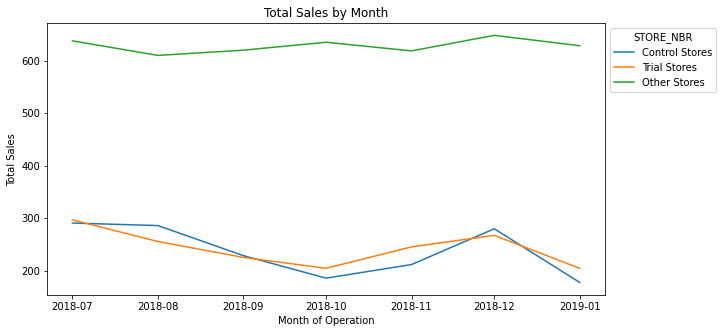

In [241]:
#create a plot 
plt.figure(figsize=(10,5))
plt.plot(create_plot(sales_df,"total_sales","Control Stores","Trial Stores","Other Stores"))
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Stores', 'Trial Stores', 'Other Stores'], loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE_NBR")
    

In [242]:
# Do for num_customers
# create plot table
create_plot(sales_df,"num_customer","Control Stores","Trial Stores","Other Stores")

,Control Stores,Trial Stores,Other Stores
plotMONTH,,,
2018-07-01,51,51,72.333333
2018-08-01,48,47,72.120155
2018-09-01,42,42,70.131783
2018-10-01,35,37,71.608527
2018-11-01,40,41,70.534884
2018-12-01,47,46,73.515504
2019-01-01,35,35,71.240310


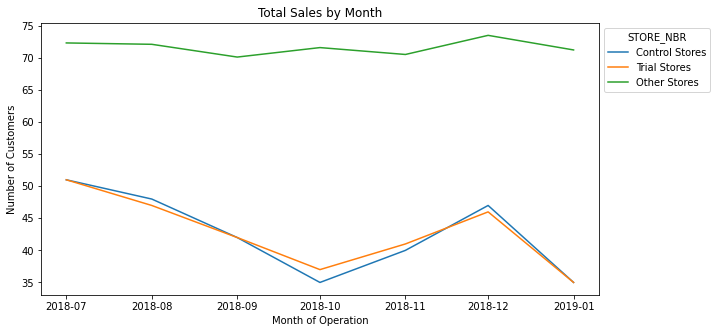

In [243]:
#create a plot 
plt.figure(figsize=(10,5))
plt.plot(create_plot(sales_df,"num_customer","Control Stores","Trial Stores","Other Stores"))
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(['Control Stores', 'Trial Stores', 'Other Stores'], loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE_NBR")

In [244]:
pretrial_metrics.head()

,STORE_NBR,YEARMONTH,total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit,store_type,plotMONTH
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [245]:
#create scaling factor trial to control store
def scaling_factor(metric_col,df=pretrial_metrics):
  trial_store_sum = df.loc[df["store_type"]=="Trial Stores",metric_col].sum()
  control_store_sum = df.loc[df["store_type"]=="Control Stores",metric_col].sum()
  scalling_factors = trial_store_sum/control_store_sum
  return scalling_factors

- Hypothesis Testing
- Null Hypothesis of this experiment is 
that the trial period is the same as the pre-trial period.
-Alternative Hypothesis of this experiment is 
that the trial period is not the same as the pre-trial period.
 We test through checking the standard deviation

In [246]:
def concat_factor_sales(df,metric_col,current_df=df_metrics):
  trial_store_sum = df[df["store_type"]=="Trial Stores"][metric_col].sum()
  control_store_sum = df[df["store_type"]=="Control Stores"][metric_col].sum()
  #do scalling to compare with control store
  scalling_factor = trial_store_sum/control_store_sum
  current_df['plotMONTH'] = pd.to_datetime(df_metrics['YEARMONTH'].astype(str), format = '%Y%m')
  scaledControlSales = current_df
  scaledControlSales = scaledControlSales.loc[scaledControlSales['STORE_NBR'] == control_Store]
  scaledControlSales['controlSales'] = scaledControlSales[metric_col] * scalling_factor

  percentageDiff = scaledControlSales[['YEARMONTH', 'controlSales']]
  percentageDiff.reset_index(drop = True, inplace = True)

  # Concatenate with trial store 'num_Customers'
  trialCust = df_metrics.loc[df_metrics['STORE_NBR'] == trial_store, metric_col]
  trialCust.reset_index(drop = True, inplace = True)
  percentageDiff = pd.concat([percentageDiff, trialCust], axis = 1)
  percentageDiff.rename(columns={metric_col:"trialSales"},inplace=True)
  # Calculate percentage difference and put it in a new column
  percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.trialSales) / percentageDiff.controlSales
  scaled = (scaledControlSales,percentageDiff)
  return scaled

In [247]:
scaledControlSales,percentageDiff = concat_factor_sales(pretrial_metrics,"total_sales")

In [248]:
percentageDiff.head()

,YEARMONTH,controlSales,trialSales,percentageDiff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516


In [249]:
scaledControlSales.head()

,STORE_NBR,YEARMONTH,total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit,plotMONTH,controlSales
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,2018-07-01,297.565550
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,2018-08-01,292.652187
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,2018-09-01,233.998916
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,2018-10-01,190.085733
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,2018-11-01,216.597421


In [250]:
print(f"The 95% percentile of the t-distribution is {t.ppf(1-0.05,7)}")

The 95% percentile of the t-distribution is 1.894578605061305


In [251]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.049940762641425544

In [252]:
def plot_scaled(df,month,metric_col):
  df[month] = pd.to_datetime(df["YEARMONTH"].astype(str), format = '%Y%m')
  df = df.loc[:, [month, metric_col]]
  df.set_index(month,inplace=True)
  return df 

In [253]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'
# trial period start from february 2019 to april 2019
from scipy.stats import t
dof = 6  # 7 samples
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), ['YEARMONTH','tValue']]

,YEARMONTH,tValue
7,201902,1.183534
8,201903,7.339116
9,201904,12.476373


T-Value is much larger than 95% of the t-distribution on March and April


In [254]:
#create control store sales
controlStoreSales = plot_scaled(scaledControlSales,"plotMONTH","controlSales")
controlStoreSales.rename(columns={"controlSales": "Control Sales"},inplace=True)
controlStoreSales

,Control Sales
plotMONTH,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421
2018-12-01,286.408121
2019-01-01,181.692071
2019-02-01,249.762622
2019-03-01,203.802205


In [255]:
#create trial store sales
trialStoreSales = df_metrics[df_metrics["STORE_NBR"] == trial_store] 
trialStoreSales = plot_scaled(trialStoreSales,"plotMONTH","total_sales")
trialStoreSales.rename(columns={"total_sales":"Trial Sales"},inplace=True)
trialStoreSales

,Trial Sales
plotMONTH,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4
2019-02-01,235.0
2019-03-01,278.5


In [256]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
controlStoreSales['Control 5% Confidence Interval'] = controlStoreSales['Control Sales'] * (1 - stdDev*2)
controlStoreSales['Control 95% Confidence Interval'] = controlStoreSales['Control Sales'] * (1 + stdDev*2)
controlStoreSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval
plotMONTH,,,
2018-07-01,297.565550,267.844249,327.286851
2018-08-01,292.652187,263.421640,321.882734
2018-09-01,233.998916,210.626747,257.371084
2018-10-01,190.085733,171.099680,209.071786
2018-11-01,216.597421,194.963341,238.231502
2018-12-01,286.408121,257.801241,315.015001
2019-01-01,181.692071,163.544390,199.839753
2019-02-01,249.762622,224.815950,274.709294
2019-03-01,203.802205,183.446130,224.158280


In [257]:
combineControlTrial_sales = pd.merge(controlStoreSales,trialStoreSales,left_index=True,right_index=True)
combineControlTrial_sales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Sales
plotMONTH,,,,
2018-07-01,297.565550,267.844249,327.286851,296.8
2018-08-01,292.652187,263.421640,321.882734,255.5
2018-09-01,233.998916,210.626747,257.371084,225.2
2018-10-01,190.085733,171.099680,209.071786,204.5
2018-11-01,216.597421,194.963341,238.231502,245.3
2018-12-01,286.408121,257.801241,315.015001,267.3
2019-01-01,181.692071,163.544390,199.839753,204.4
2019-02-01,249.762622,224.815950,274.709294,235.0
2019-03-01,203.802205,183.446130,224.158280,278.5


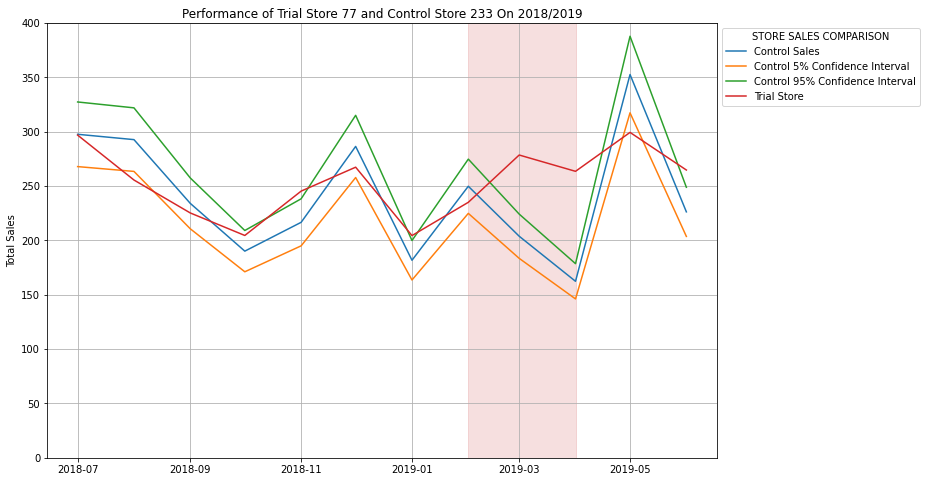

In [258]:
# plot the combined data
plt.figure(figsize = (12, 8))
plt.plot(combineControlTrial_sales)
  
# Set graph title and axis title
plt.title(f'Performance of Trial Store {trial_store} and Control Store {control_Store} On 2018/2019')
plt.ylabel('Total Sales')

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'],loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE SALES COMPARISON")

# Set new y-axis limit
plt.ylim((0, 400))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = '#d65f5f', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

The graph implies that the increase in sales in the trial store 77 in March and April is statistically greater than in the control store. The trial store performance lies outdside the 5% and 95% confidence interval.(shown by red  line)

In [259]:
trial_store_sum = pretrial_metrics[pretrial_metrics["store_type"]=="Trial Stores"]["num_customer"].sum()
control_store_sum = pretrial_metrics[pretrial_metrics["store_type"]=="Control Stores"]["num_customer"].sum()

#do scalling to compare with control store
scalling_factor = trial_store_sum/control_store_sum
df_metrics['plotMONTH'] = pd.to_datetime(df_metrics['YEARMONTH'].astype(str), format = '%Y%m')
scaledControlCust = df_metrics
scaledControlCust = scaledControlCust.loc[scaledControlCust['STORE_NBR'] == control_Store]
scaledControlCust['controlCustomers'] = scaledControlCust['num_customer'] * scalling_factor
scaledControlCust.head()


,STORE_NBR,YEARMONTH,total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit,plotMONTH,controlCustomers
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,2018-07-01,51.171141
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,2018-08-01,48.161074
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,2018-09-01,42.140940
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,2018-10-01,35.117450
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,2018-11-01,40.134228


In [260]:
def concat_factor_customer(df,metric_col,current_df=df_metrics):
  trial_store_sum = df[df["store_type"]=="Trial Stores"][metric_col].sum()
  control_store_sum = df[df["store_type"]=="Control Stores"][metric_col].sum()
  #do scalling to compare with control store
  scalling_factor = trial_store_sum/control_store_sum
  current_df['plotMONTH'] = pd.to_datetime(df_metrics['YEARMONTH'].astype(str), format = '%Y%m')
  scaledControlCust = current_df
  scaledControlCust = scaledControlCust.loc[scaledControlCust['STORE_NBR'] == control_Store]
  scaledControlCust['ControlCustomers'] = scaledControlCust['num_customer'] * scalling_factor

  percentageDiff = scaledControlCust[['YEARMONTH', 'ControlCustomers']]
  percentageDiff.reset_index(drop = True, inplace = True)

  # Concatenate with trial store 'num_Customers'
  trialCust = df_metrics.loc[df_metrics['STORE_NBR'] == trial_store, 'num_customer']
  trialCust.reset_index(drop = True, inplace = True)
  percentageDiff = pd.concat([percentageDiff, trialCust], axis = 1)
  percentageDiff.rename(columns={"num_customer":"TrialNumCust"},inplace=True)
  # Calculate percentage difference and put it in a new column
  percentageDiff['percentageDiff'] = abs(percentageDiff.ControlCustomers - percentageDiff.TrialNumCust) / percentageDiff.ControlCustomers
  scaled = (scaledControlCust,percentageDiff)
  return scaled

In [261]:
scaledControlCust,percentageDiff = concat_factor_customer(pretrial_metrics,"num_customer")

In [262]:
percentageDiff.head()

,YEARMONTH,ControlCustomers,TrialNumCust,percentageDiff
0,201807,51.171141,51,0.003344
1,201808,48.161074,47,0.024108
2,201809,42.140940,42,0.003344
3,201810,35.117450,37,0.053607
4,201811,40.134228,41,0.021572


In [263]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.018240748558243945

In [264]:
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), ['YEARMONTH','tValue']]

,YEARMONTH,tValue
7,201902,0.183352
8,201903,13.476388
9,201904,30.778725


In [265]:
dof=6
t.ppf(1-0.05, dof)

1.9431802803927816

In [266]:
controlCust = plot_scaled(scaledControlCust,"plotMONTH","ControlCustomers")
controlCust.rename(columns={"ControlCustomers": "Control Customers"},inplace=True)
controlCust

,Control Customers
plotMONTH,
2018-07-01,51.171141
2018-08-01,48.161074
2018-09-01,42.140940
2018-10-01,35.117450
2018-11-01,40.134228
2018-12-01,47.157718
2019-01-01,35.117450
2019-02-01,45.151007
2019-03-01,40.134228


In [267]:
trialCust = df_metrics.loc[df_metrics["STORE_NBR"]==trial_store]
trialCust = plot_scaled(trialCust,"plotMONTH","num_customer")
trialCust.rename(columns={"num_customer": "Trial Customers"},inplace=True)
trialCust

,Trial Customers
plotMONTH,
2018-07-01,51
2018-08-01,47
2018-09-01,42
2018-10-01,37
2018-11-01,41
2018-12-01,46
2019-01-01,35
2019-02-01,45
2019-03-01,50


In [268]:
controlCust['Control 5% Confidence Interval'] = controlCust['Control Customers'] * (1 - stdDev*2)
controlCust['Control 95% Confidence Interval'] = controlCust['Control Customers'] * (1 + stdDev*2)
controlCust

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval
plotMONTH,,,
2018-07-01,51.171141,49.304341,53.037941
2018-08-01,48.161074,46.404086,49.918062
2018-09-01,42.140940,40.603575,43.678304
2018-10-01,35.117450,33.836313,36.398587
2018-11-01,40.134228,38.670071,41.598385
2018-12-01,47.157718,45.437334,48.878102
2019-01-01,35.117450,33.836313,36.398587
2019-02-01,45.151007,43.503830,46.798183
2019-03-01,40.134228,38.670071,41.598385


In [269]:
combineCust = pd.merge(controlCust,trialCust,left_index = True, right_index = True)
combineCust

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Customers
plotMONTH,,,,
2018-07-01,51.171141,49.304341,53.037941,51
2018-08-01,48.161074,46.404086,49.918062,47
2018-09-01,42.140940,40.603575,43.678304,42
2018-10-01,35.117450,33.836313,36.398587,37
2018-11-01,40.134228,38.670071,41.598385,41
2018-12-01,47.157718,45.437334,48.878102,46
2019-01-01,35.117450,33.836313,36.398587,35
2019-02-01,45.151007,43.503830,46.798183,45
2019-03-01,40.134228,38.670071,41.598385,50


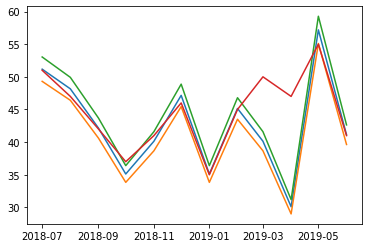

In [270]:
plt.plot(combineCust)

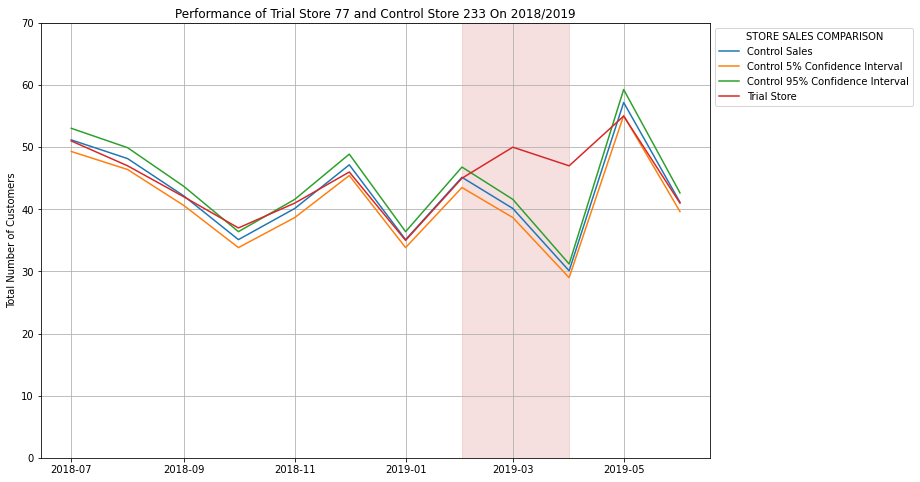

In [271]:
# plot the combined data
plt.figure(figsize = (12, 8))
plt.plot(combineCust)
  
# Set graph title and axis title
plt.title(f'Performance of Trial Store {trial_store} and Control Store {control_Store} On 2018/2019')
plt.ylabel('Total Number of Customers')

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'],loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE SALES COMPARISON")

# Set new y-axis limit
plt.ylim((0, 70))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = '#d65f5f', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

## Trial Store 86 and Control Store


In [272]:
# Compute Correlation
trial_store = 86 
corr_total_sales = calculateCorrelation("total_sales",trial_store)
corr_num_customers = calculateCorrelation('num_customer', trial_store)

magnitude_total_sales = calculateMagnitudeDistance("total_sales",trial_store)
magnitude_num_customers = calculateMagnitudeDistance("num_customer",trial_store)

In [273]:
corr_total_sales.head()

,trial_store,control_store,Correlation
0,86.0,1.0,0.445632
1,86.0,2.0,-0.403835
2,86.0,3.0,-0.261284
3,86.0,4.0,-0.039035
4,86.0,5.0,0.235159


In [274]:
# Concatenate the scores together for 'total_sales'
score_total_sales = pd.concat([corr_total_sales, magnitude_total_sales['Magnitude']], axis = 1)

In [275]:
score_num_customers =pd.concat([corr_num_customers, magnitude_num_customers['Magnitude']], axis = 1)

In [276]:
# Add a weighted average column 
corr_weight = 0.5
score_total_sales['score_total_sales'] = corr_weight * score_total_sales['Correlation'] + (1 - corr_weight) * score_total_sales['Magnitude']
score_total_sales.head()

,trial_store,control_store,Correlation,Magnitude,score_total_sales
0,86.0,1.0,0.445632,0.488334,0.466983
1,86.0,2.0,-0.403835,0.321131,-0.041352
2,86.0,3.0,-0.261284,0.507515,0.123116
3,86.0,4.0,-0.039035,0.635654,0.298309
4,86.0,5.0,0.235159,0.579835,0.407497


In [277]:
# Again add a new column for weighted average
score_num_customers['score_num_cust'] = corr_weight * score_num_customers['Correlation'] + (1 - corr_weight) * score_num_customers['Magnitude']
score_num_customers.head()

,trial_store,control_store,Correlation,Magnitude,score_num_cust
0,86.0,1.0,0.485831,0.510204,0.498018
1,86.0,2.0,-0.086161,0.428571,0.171205
2,86.0,3.0,-0.353786,0.563025,0.104620
3,86.0,4.0,-0.169608,0.537815,0.184103
4,86.0,5.0,-0.253229,0.714286,0.230528


In [278]:
# Index both 'score_total_sales' and 'score_num_cust' dataframe
score_total_sales.set_index(['trial_store', 'control_store'], inplace = True)
score_num_customers.set_index(['trial_store', 'control_store'], inplace = True)

In [279]:
# Create a new dataframe 'score_Control' which takes the average of 'score_total_sales' and 'score_num_cust'
score_Control = pd.concat([score_total_sales['score_total_sales'], score_num_customers['score_num_cust']], axis = 1)
score_Control

score_total_sales  score_num_cust
trial_store control_store                                   
86.0        1.0                     0.466983        0.498018
            2.0                    -0.041352        0.171205
            3.0                     0.123116        0.104620
            4.0                     0.298309        0.184103
            5.0                     0.407497        0.230528
...                                      ...             ...
            268.0                  -0.080126        0.266027
            269.0                   0.588661        0.241523
            270.0                  -0.106832       -0.058237
            271.0                   0.546651        0.432804
            272.0                   0.294383        0.139863

[260 rows x 2 columns]

In [280]:
# Add a new column to 'score_Control' which computes the average of 'scoreNSales' and 'scoreNCust'
score_Control['finalControlScore'] = 0.5 * (score_Control['score_total_sales'] + score_Control['score_num_cust'])
score_Control.head()

score_total_sales  score_num_cust  finalControlScore
trial_store control_store                                                      
86.0        1.0                     0.466983        0.498018           0.482500
            2.0                    -0.041352        0.171205           0.064927
            3.0                     0.123116        0.104620           0.113868
            4.0                     0.298309        0.184103           0.241206
            5.0                     0.407497        0.230528           0.319013

In [281]:
# top 5 stores with highest finalControlScore
top_5_finalControlSCore = score_Control.sort_values("finalControlScore",ascending=False)
top_5_finalControlSCore.head()

score_total_sales  score_num_cust  finalControlScore
trial_store control_store                                                      
86.0        155.0                   0.808106        0.733343           0.770724
            109.0                   0.697120        0.742532           0.719826
            114.0                   0.631393        0.663384           0.647389
            225.0                   0.601841        0.684356           0.643099
            138.0                   0.593296        0.660565           0.626930

In [282]:
#divide three categories of control,trial and other types 
sales_df = pretrial_metrics
control_Store =155
store_type = []
options = {trial_store: "Trial Stores",control_Store: "Control Stores", }

for i in sales_df["STORE_NBR"]:
    the_thing = options.get(i, "Other Stores")
    store_type.append(the_thing)

sales_df["store_type"] = store_type
sales_df.head()

,STORE_NBR,YEARMONTH,total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit,store_type,plotMONTH
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [283]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STORE_NBR        1820 non-null   int64         
 1   YEARMONTH        1820 non-null   int64         
 2   total_sales      1820 non-null   float64       
 3   num_customer     1820 non-null   int64         
 4   nTxnPerCustomer  1820 non-null   float64       
 5   nChipePerTxn     1820 non-null   float64       
 6   avgPricePerUnit  1820 non-null   float64       
 7   store_type       1820 non-null   object        
 8   plotMONTH        1820 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 142.2+ KB


In [284]:
#create plot table from create_plot function created 
create_plot(sales_df,"total_sales","Control Stores","Trial Stores","Other Stores")

,Control Stores,Trial Stores,Other Stores
plotMONTH,,,
2018-07-01,924.6,892.20,633.239922
2018-08-01,782.7,764.05,606.326744
2018-09-01,1014.4,914.60,614.480620
2018-10-01,963.8,948.40,629.415504
2018-11-01,898.8,918.00,613.593411
2018-12-01,849.8,841.20,644.020155
2019-01-01,874.6,841.40,623.513566


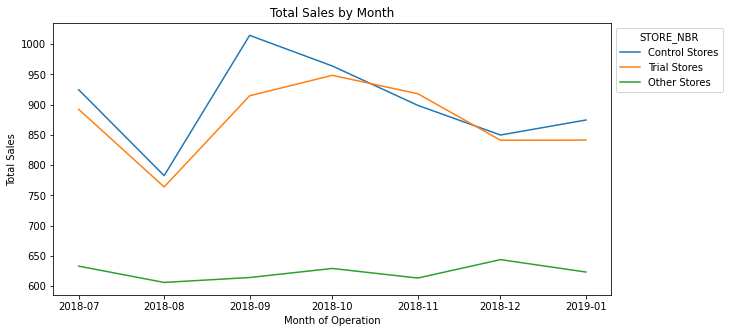

In [285]:
#create a plot 
plt.figure(figsize=(10,5))
plt.plot(create_plot(sales_df,"total_sales","Control Stores","Trial Stores","Other Stores"))
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Stores', 'Trial Stores', 'Other Stores'], loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE_NBR")

In [286]:
#create plot table from create_plot function created 
create_plot(sales_df,"num_customer","Control Stores","Trial Stores","Other Stores")

,Control Stores,Trial Stores,Other Stores
plotMONTH,,,
2018-07-01,101,99,71.953488
2018-08-01,91,94,71.771318
2018-09-01,103,103,69.658915
2018-10-01,108,109,71.046512
2018-11-01,101,100,70.069767
2018-12-01,97,98,73.120155
2019-01-01,96,94,70.775194


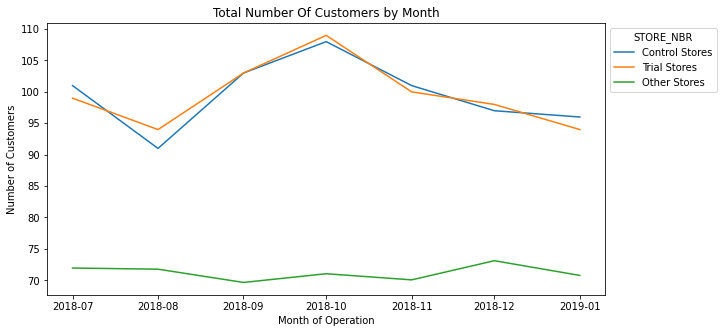

In [287]:
#create a plot 
plt.figure(figsize=(10,5))
plt.plot(create_plot(sales_df,"num_customer","Control Stores","Trial Stores","Other Stores"))
plt.title('Total Number Of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(['Control Stores', 'Trial Stores', 'Other Stores'], loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE_NBR")

In [288]:
scaledControlSales,percentageDiff = concat_factor_sales(pretrial_metrics,"total_sales")

In [289]:
scaledControlSales.head()

,STORE_NBR,YEARMONTH,total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit,plotMONTH,controlSales
1793,155,201807,924.6,101,1.217822,2.032520,3.698400,2018-07-01,896.922236
1794,155,201808,782.7,91,1.307692,1.924370,3.417904,2018-08-01,759.269991
1795,155,201809,1014.4,103,1.398058,2.013889,3.497931,2018-09-01,984.034086
1796,155,201810,963.8,108,1.259259,2.000000,3.543382,2018-10-01,934.948790
1797,155,201811,898.8,101,1.316832,2.030075,3.328889,2018-11-01,871.894555


In [290]:
percentageDiff.head()

,YEARMONTH,controlSales,trialSales,percentageDiff
0,201807,896.922236,892.20,0.005265
1,201808,759.269991,764.05,0.006296
2,201809,984.034086,914.60,0.070561
3,201810,934.948790,948.40,0.014387
4,201811,871.894555,918.00,0.052880


In [291]:
from statistics import stdev
stdDev = stdev(percentageDiff[percentageDiff["YEARMONTH"] < 201902]["percentageDiff"])
stdDev

0.025833952854772586

In [292]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'
# trial period start from february 2019 to april 2019
from scipy.stats import t
dof = 7  # 8 samples
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), ['YEARMONTH','tValue']]

,YEARMONTH,tValue
7,201902,2.179542
8,201903,12.226922
9,201904,1.364580


In [293]:
#significant value(alpha) = 0.05 and 95% percentile
print(f"The 95% percentile of the t-distribution is {t.ppf(1-0.05,7)}")

The 95% percentile of the t-distribution is 1.894578605061305


In [294]:
#create control store sales using plot_scaledSales function
controlStoreSales = plot_scaled(scaledControlSales,"plotMONTH","controlSales")
controlStoreSales.rename(columns={"controlSales": "Control Sales"},inplace=True)
controlStoreSales

,Control Sales
plotMONTH,
2018-07-01,896.922236
2018-08-01,759.269991
2018-09-01,984.034086
2018-10-01,934.948790
2018-11-01,871.894555
2018-12-01,824.361363
2019-01-01,848.418979
2019-02-01,864.522060
2019-03-01,780.320405


In [295]:
#create trial store sales
trialStoreSales = df_metrics[df_metrics["STORE_NBR"] == trial_store] 
trialStoreSales = plot_scaled(trialStoreSales,"plotMONTH","total_sales")
trialStoreSales.rename(columns={"total_sales":"Trial Sales"},inplace=True)
trialStoreSales

,Trial Sales
plotMONTH,
2018-07-01,892.20
2018-08-01,764.05
2018-09-01,914.60
2018-10-01,948.40
2018-11-01,918.00
2018-12-01,841.20
2019-01-01,841.40
2019-02-01,913.20
2019-03-01,1026.80


In [296]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
controlStoreSales['Control 5% Confidence Interval'] = controlStoreSales['Control Sales'] * (1 - stdDev*2)
controlStoreSales['Control 95% Confidence Interval'] = controlStoreSales['Control Sales'] * (1 + stdDev*2)
controlStoreSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval
plotMONTH,,,
2018-07-01,896.922236,850.580142,943.264329
2018-08-01,759.269991,720.040101,798.499882
2018-09-01,984.034086,933.191106,1034.877067
2018-10-01,934.948790,886.641944,983.255636
2018-11-01,871.894555,826.845589,916.943521
2018-12-01,824.361363,781.768338,866.954388
2019-01-01,848.418979,804.582947,892.255010
2019-02-01,864.522060,819.854016,909.190104
2019-03-01,780.320405,740.002884,820.637926


In [297]:
combineControlTrial_sales = pd.merge(controlStoreSales,trialStoreSales,left_index=True,right_index=True)
combineControlTrial_sales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Sales
plotMONTH,,,,
2018-07-01,896.922236,850.580142,943.264329,892.20
2018-08-01,759.269991,720.040101,798.499882,764.05
2018-09-01,984.034086,933.191106,1034.877067,914.60
2018-10-01,934.948790,886.641944,983.255636,948.40
2018-11-01,871.894555,826.845589,916.943521,918.00
2018-12-01,824.361363,781.768338,866.954388,841.20
2019-01-01,848.418979,804.582947,892.255010,841.40
2019-02-01,864.522060,819.854016,909.190104,913.20
2019-03-01,780.320405,740.002884,820.637926,1026.80


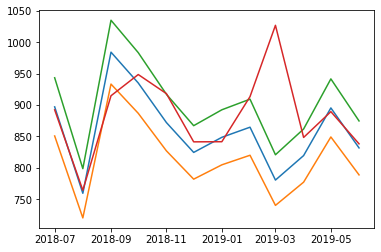

In [298]:
plt.plot(combineControlTrial_sales)

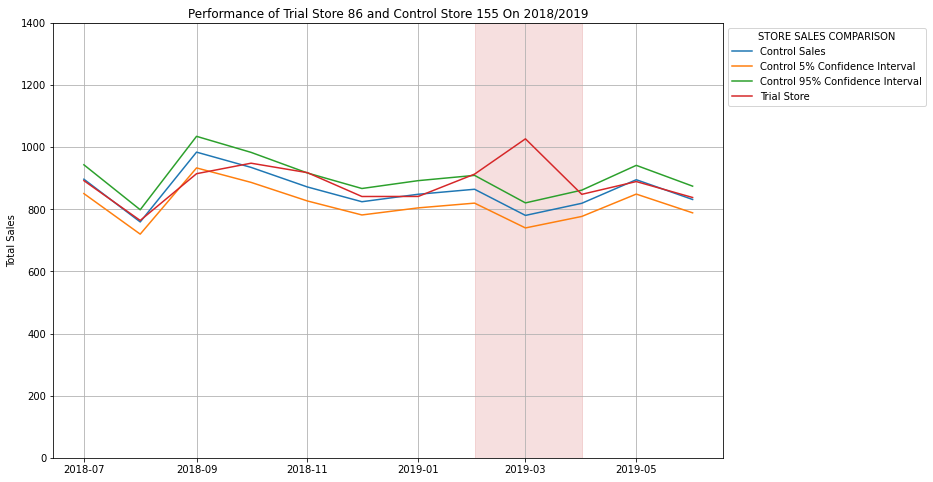

In [299]:
# plot the combined data
plt.figure(figsize = (12, 8))
plt.plot(combineControlTrial_sales)
  
# Set graph title and axis title
plt.title(f'Performance of Trial Store {trial_store} and Control Store {control_Store} On 2018/2019')
plt.ylabel('Total Sales')

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'],loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE SALES COMPARISON")

# Set new y-axis limit
plt.ylim((0, 1400))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = '#d65f5f', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

For the store 86, it is shown that the trial in March is significantly different with total sales performance. However, there is not significant in February and April.

In [300]:
scaledControlCust,percentageDiff = concat_factor_customer(pretrial_metrics,"num_customer")

In [301]:

percentageDiff.head()

,YEARMONTH,ControlCustomers,TrialNumCust,percentageDiff
0,201807,101.0,99,0.019802
1,201808,91.0,94,0.032967
2,201809,103.0,103,0.000000
3,201810,108.0,109,0.009259
4,201811,101.0,100,0.009901


In [302]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.010687444701395236

In [303]:
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), ['YEARMONTH','tValue']]

,YEARMONTH,tValue
7,201902,11.819082
8,201903,20.903430
9,201904,5.670772


In [304]:
# Find the 95th percentile of the t distribution with dof = 7
print(f"The 95% percentile of t-distribution is {t.ppf(1-0.05, dof)}")

The 95% percentile of t-distribution is 1.894578605061305


In [305]:
controlCust = plot_scaled(scaledControlCust,"plotMONTH","ControlCustomers")
controlCust.rename(columns={"ControlCustomers": "Control Customers"},inplace=True)
controlCust

,Control Customers
plotMONTH,
2018-07-01,101.0
2018-08-01,91.0
2018-09-01,103.0
2018-10-01,108.0
2018-11-01,101.0
2018-12-01,97.0
2019-01-01,96.0
2019-02-01,95.0
2019-03-01,94.0


In [306]:
trialCust = df_metrics.loc[df_metrics["STORE_NBR"]==trial_store]
trialCust = plot_scaled(trialCust,"plotMONTH","num_customer")
trialCust.rename(columns={"num_customer": "Trial Customers"},inplace=True)
trialCust

,Trial Customers
plotMONTH,
2018-07-01,99
2018-08-01,94
2018-09-01,103
2018-10-01,109
2018-11-01,100
2018-12-01,98
2019-01-01,94
2019-02-01,107
2019-03-01,115


In [307]:
controlCust['Control 5% Confidence Interval'] = controlCust['Control Customers'] * (1 - stdDev*2)
controlCust['Control 95% Confidence Interval'] = controlCust['Control Customers'] * (1 + stdDev*2)
controlCust

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval
plotMONTH,,,
2018-07-01,101.0,98.841136,103.158864
2018-08-01,91.0,89.054885,92.945115
2018-09-01,103.0,100.798386,105.201614
2018-10-01,108.0,105.691512,110.308488
2018-11-01,101.0,98.841136,103.158864
2018-12-01,97.0,94.926636,99.073364
2019-01-01,96.0,93.948011,98.051989
2019-02-01,95.0,92.969386,97.030614
2019-03-01,94.0,91.990760,96.009240


In [308]:
combineCust = pd.merge(controlCust,trialCust,left_index = True, right_index = True)
combineCust

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Customers
plotMONTH,,,,
2018-07-01,101.0,98.841136,103.158864,99
2018-08-01,91.0,89.054885,92.945115,94
2018-09-01,103.0,100.798386,105.201614,103
2018-10-01,108.0,105.691512,110.308488,109
2018-11-01,101.0,98.841136,103.158864,100
2018-12-01,97.0,94.926636,99.073364,98
2019-01-01,96.0,93.948011,98.051989,94
2019-02-01,95.0,92.969386,97.030614,107
2019-03-01,94.0,91.990760,96.009240,115


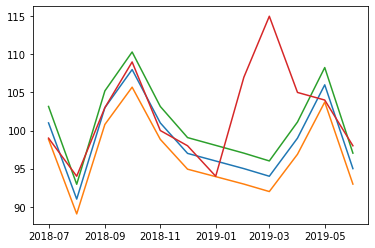

In [309]:
plt.plot(combineCust)

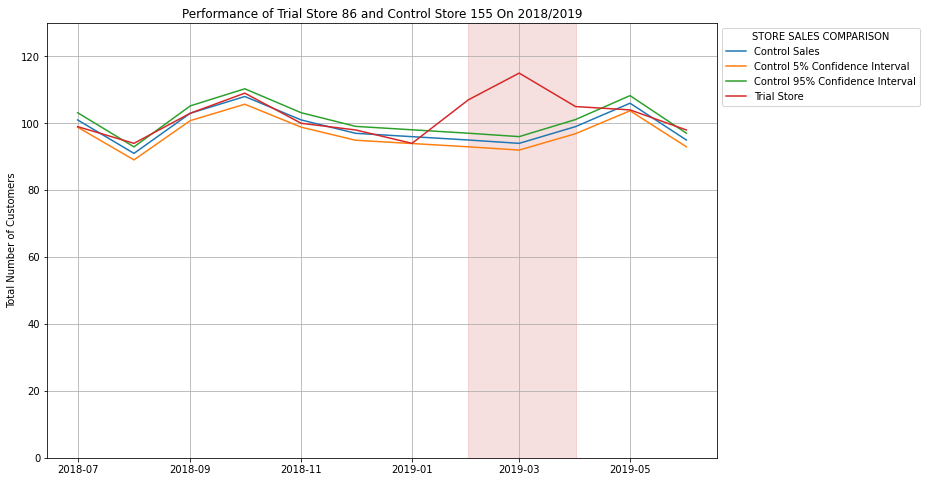

In [310]:
# plot the combined data
plt.figure(figsize = (12, 8))
plt.plot(combineCust)
  
# Set graph title and axis title
plt.title(f'Performance of Trial Store {trial_store} and Control Store {control_Store} On 2018/2019')
plt.ylabel('Total Number of Customers')

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'],loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE SALES COMPARISON")

# Set new y-axis limit
plt.ylim((0, 130))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = '#d65f5f', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

The graph shows that the trial number of customer is significantly different on the three months. This implies that the trial had an significant increase to number of customer.

## Trial Store 88 and Control Store

In [311]:
# Compute Correlation
trial_store = 88 
corr_total_sales = calculateCorrelation("total_sales",trial_store)
corr_num_customers = calculateCorrelation('num_customer', trial_store)

magnitude_total_sales = calculateMagnitudeDistance("total_sales",trial_store)
magnitude_num_customers = calculateMagnitudeDistance("num_customer",trial_store)

In [312]:
corr_total_sales.head()

,trial_store,control_store,Correlation
0,88.0,1.0,0.813636
1,88.0,2.0,-0.067927
2,88.0,3.0,-0.507847
3,88.0,4.0,-0.745566
4,88.0,5.0,0.190330


In [313]:
# Concatenate the scores together for 'total_sales'
score_total_sales = pd.concat([corr_total_sales, magnitude_total_sales['Magnitude']], axis = 1)

In [314]:
score_num_customers =pd.concat([corr_num_customers, magnitude_num_customers['Magnitude']], axis = 1)

In [315]:
# Add a weighted average column 
corr_weight = 0.5
score_total_sales['score_total_sales'] = corr_weight * score_total_sales['Correlation'] + (1 - corr_weight) * score_total_sales['Magnitude']
score_total_sales.head()

,trial_store,control_store,Correlation,Magnitude,score_total_sales
0,88.0,1.0,0.813636,0.548959,0.681297
1,88.0,2.0,-0.067927,0.541212,0.236643
2,88.0,3.0,-0.507847,0.458109,-0.024869
3,88.0,4.0,-0.745566,0.484447,-0.130559
4,88.0,5.0,0.190330,0.496409,0.343370


In [316]:
# Again add a new column for weighted average
score_num_customers['score_num_cust'] = corr_weight * score_num_customers['Correlation'] + (1 - corr_weight) * score_num_customers['Magnitude']
score_num_customers.head()

,trial_store,control_store,Correlation,Magnitude,score_num_cust
0,88.0,1.0,0.305334,0.357143,0.331238
1,88.0,2.0,-0.452379,0.285714,-0.083332
2,88.0,3.0,0.522884,0.683673,0.603279
3,88.0,4.0,-0.361503,0.577922,0.108210
4,88.0,5.0,-0.025320,0.558442,0.266561


In [317]:
# Index both 'score_total_sales' and 'score_num_cust' dataframe
score_total_sales.set_index(['trial_store', 'control_store'], inplace = True)
score_num_customers.set_index(['trial_store', 'control_store'], inplace = True)

In [318]:
# Create a new dataframe 'score_Control' which takes the average of 'score_total_sales' and 'score_num_cust'
score_Control = pd.concat([score_total_sales['score_total_sales'], score_num_customers['score_num_cust']], axis = 1)
score_Control

score_total_sales  score_num_cust
trial_store control_store                                   
88.0        1.0                     0.681297        0.331238
            2.0                     0.236643       -0.083332
            3.0                    -0.024869        0.603279
            4.0                    -0.130559        0.108210
            5.0                     0.343370        0.266561
...                                      ...             ...
            268.0                   0.250709        0.651462
            269.0                   0.196139        0.043061
            270.0                  -0.104971        0.132467
            271.0                   0.163091        0.318507
            272.0                  -0.077482        0.237944

[260 rows x 2 columns]

In [319]:
# Add a new column to 'score_Control' which computes the average of 'scoreNSales' and 'scoreNCust'
score_Control['finalControlScore'] = 0.5 * (score_Control['score_total_sales'] + score_Control['score_num_cust'])
score_Control.head()

score_total_sales  score_num_cust  finalControlScore
trial_store control_store                                                      
88.0        1.0                     0.681297        0.331238           0.506268
            2.0                     0.236643       -0.083332           0.076655
            3.0                    -0.024869        0.603279           0.289205
            4.0                    -0.130559        0.108210          -0.011175
            5.0                     0.343370        0.266561           0.304965

In [320]:
# top 5 stores with highest finalControlScore
top_5_finalControlSCore = score_Control.sort_values("finalControlScore",ascending=False)
top_5_finalControlSCore.head()

score_total_sales  score_num_cust  finalControlScore
trial_store control_store                                                      
88.0        178.0                   0.650803        0.707828           0.679316
            14.0                    0.646064        0.685774           0.665919
            134.0                   0.775084        0.540154           0.657619
            237.0                   0.451974        0.777235           0.614604
            187.0                   0.616752        0.594560           0.605656

In [321]:
#divide three categories of control,trial and other types 
# control stroe 237 aftr checking the visualization of significance
sales_df = pretrial_metrics
control_Store = 237
store_type = []
options = {trial_store: "Trial Stores",control_Store: "Control Stores", }

for i in sales_df["STORE_NBR"]:
    the_thing = options.get(i, "Other Stores")
    store_type.append(the_thing)

sales_df["store_type"] = store_type
sales_df.head()

,STORE_NBR,YEARMONTH,total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit,store_type,plotMONTH
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [322]:
#create plot table from create_plot function created 
create_plot(sales_df,"total_sales","Control Stores","Trial Stores","Other Stores")

,Control Stores,Trial Stores,Other Stores
plotMONTH,,,
2018-07-01,1448.4,1310.0,629.590310
2018-08-01,1367.8,1323.8,601.889341
2018-09-01,1322.2,1423.0,611.317054
2018-10-01,1348.3,1352.4,626.359302
2018-11-01,1397.6,1382.8,609.858527
2018-12-01,1265.0,1325.2,640.534884
2019-01-01,1219.7,1266.4,620.528682


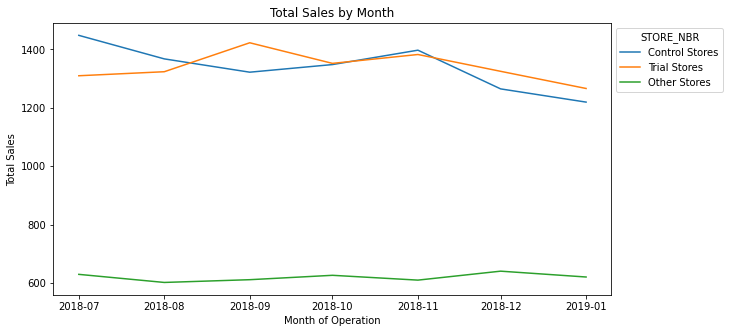

In [323]:
#create a plot 
plt.figure(figsize=(10,5))
plt.plot(create_plot(sales_df,"total_sales","Control Stores","Trial Stores","Other Stores"))
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Stores', 'Trial Stores', 'Other Stores'], loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE_NBR")

In [324]:
#create plot table from create_plot function created 
create_plot(sales_df,"num_customer","Control Stores","Trial Stores","Other Stores")

,Control Stores,Trial Stores,Other Stores
plotMONTH,,,
2018-07-01,128,129,71.732558
2018-08-01,135,131,71.457364
2018-09-01,126,124,69.488372
2018-10-01,123,123,70.934109
2018-11-01,132,130,69.833333
2018-12-01,124,126,72.906977
2019-01-01,117,117,70.604651


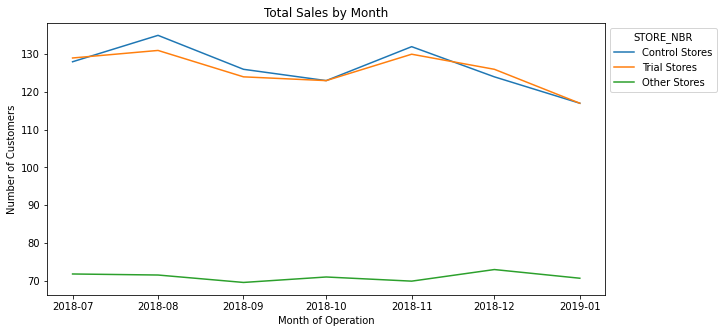

In [325]:
#create a plot 
plt.figure(figsize=(10,5))
plt.plot(create_plot(sales_df,"num_customer","Control Stores","Trial Stores","Other Stores"))
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(['Control Stores', 'Trial Stores', 'Other Stores'], loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE_NBR")

In [326]:
scaledControlSales,percentageDiff = concat_factor_sales(pretrial_metrics,"total_sales")

In [327]:
scaledControlSales.head()

,STORE_NBR,YEARMONTH,total_sales,num_customer,nTxnPerCustomer,nChipePerTxn,avgPricePerUnit,plotMONTH,controlSales
2747,237,201807,1448.4,128,1.265625,2.000000,4.470370,2018-07-01,1450.657086
2748,237,201808,1367.8,135,1.222222,1.896970,4.369968,2018-08-01,1369.931485
2749,237,201809,1322.2,126,1.182540,2.006711,4.422074,2018-09-01,1324.260425
2750,237,201810,1348.3,123,1.195122,2.034014,4.509365,2018-10-01,1350.401097
2751,237,201811,1397.6,132,1.219697,1.987578,4.367500,2018-11-01,1399.777923


In [328]:
percentageDiff.head()

,YEARMONTH,controlSales,trialSales,percentageDiff
0,201807,1450.657086,1310.0,0.096961
1,201808,1369.931485,1323.8,0.033674
2,201809,1324.260425,1423.0,0.074562
3,201810,1350.401097,1352.4,0.001480
4,201811,1399.777923,1382.8,0.012129


In [329]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.03346786730307888

In [330]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'
# trial period start from february 2019 to april 2019
from scipy.stats import t
dof = 6  # 8 samples
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), ['YEARMONTH','tValue']]

,YEARMONTH,tValue
7,201902,0.781270
8,201903,6.595668
9,201904,5.768527


In [331]:
#create control store sales
controlStoreSales = plot_scaled(scaledControlSales,"plotMONTH","controlSales")
controlStoreSales.rename(columns={"controlSales": "Control Sales"},inplace=True)
controlStoreSales

,Control Sales
plotMONTH,
2018-07-01,1450.657086
2018-08-01,1369.931485
2018-09-01,1324.260425
2018-10-01,1350.401097
2018-11-01,1399.777923
2018-12-01,1266.971288
2019-01-01,1221.600696
2019-02-01,1406.989143
2019-03-01,1210.082775


In [332]:
#create trial store sales
trialStoreSales = df_metrics[df_metrics["STORE_NBR"] == trial_store] 
trialStoreSales = plot_scaled(trialStoreSales,"plotMONTH","total_sales")
trialStoreSales.rename(columns={"total_sales":"Trial Sales"},inplace=True)
trialStoreSales

,Trial Sales
plotMONTH,
2018-07-01,1310.00
2018-08-01,1323.80
2018-09-01,1423.00
2018-10-01,1352.40
2018-11-01,1382.80
2018-12-01,1325.20
2019-01-01,1266.40
2019-02-01,1370.20
2019-03-01,1477.20


In [333]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
controlStoreSales['Control 5% Confidence Interval'] = controlStoreSales['Control Sales'] * (1 - stdDev*2)
controlStoreSales['Control 95% Confidence Interval'] = controlStoreSales['Control Sales'] * (1 + stdDev*2)
controlStoreSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval
plotMONTH,,,
2018-07-01,1450.657086,1353.556288,1547.757884
2018-08-01,1369.931485,1278.234114,1461.628855
2018-09-01,1324.260425,1235.620080,1412.900769
2018-10-01,1350.401097,1260.011008,1440.791187
2018-11-01,1399.777923,1306.082759,1493.473086
2018-12-01,1266.971288,1182.165634,1351.776942
2019-01-01,1221.600696,1139.831956,1303.369436
2019-02-01,1406.989143,1312.811291,1501.166995
2019-03-01,1210.082775,1129.084996,1291.080555


In [334]:
print(f"The 95% percentile of the t-distribution is {t.ppf(1-0.05,7)}")

The 95% percentile of the t-distribution is 1.894578605061305


In [335]:
#create control store sales using plot_scaledSales function
controlStoreSales = plot_scaled(scaledControlSales,"plotMONTH","controlSales")
controlStoreSales.rename(columns={"controlSales": "Control Sales"},inplace=True)
controlStoreSales

,Control Sales
plotMONTH,
2018-07-01,1450.657086
2018-08-01,1369.931485
2018-09-01,1324.260425
2018-10-01,1350.401097
2018-11-01,1399.777923
2018-12-01,1266.971288
2019-01-01,1221.600696
2019-02-01,1406.989143
2019-03-01,1210.082775


In [336]:
#create trial store sales
trialStoreSales = df_metrics[df_metrics["STORE_NBR"] == trial_store] 
trialStoreSales = plot_scaled(trialStoreSales,"plotMONTH","total_sales")
trialStoreSales.rename(columns={"total_sales":"Trial Sales"},inplace=True)
trialStoreSales

,Trial Sales
plotMONTH,
2018-07-01,1310.00
2018-08-01,1323.80
2018-09-01,1423.00
2018-10-01,1352.40
2018-11-01,1382.80
2018-12-01,1325.20
2019-01-01,1266.40
2019-02-01,1370.20
2019-03-01,1477.20


In [337]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
controlStoreSales['Control 5% Confidence Interval'] = controlStoreSales['Control Sales'] * (1 - stdDev*2)
controlStoreSales['Control 95% Confidence Interval'] = controlStoreSales['Control Sales'] * (1 + stdDev*2)
controlStoreSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval
plotMONTH,,,
2018-07-01,1450.657086,1353.556288,1547.757884
2018-08-01,1369.931485,1278.234114,1461.628855
2018-09-01,1324.260425,1235.620080,1412.900769
2018-10-01,1350.401097,1260.011008,1440.791187
2018-11-01,1399.777923,1306.082759,1493.473086
2018-12-01,1266.971288,1182.165634,1351.776942
2019-01-01,1221.600696,1139.831956,1303.369436
2019-02-01,1406.989143,1312.811291,1501.166995
2019-03-01,1210.082775,1129.084996,1291.080555


In [338]:
combineControlTrial_sales = pd.merge(controlStoreSales,trialStoreSales,left_index=True,right_index=True)
combineControlTrial_sales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Sales
plotMONTH,,,,
2018-07-01,1450.657086,1353.556288,1547.757884,1310.00
2018-08-01,1369.931485,1278.234114,1461.628855,1323.80
2018-09-01,1324.260425,1235.620080,1412.900769,1423.00
2018-10-01,1350.401097,1260.011008,1440.791187,1352.40
2018-11-01,1399.777923,1306.082759,1493.473086,1382.80
2018-12-01,1266.971288,1182.165634,1351.776942,1325.20
2019-01-01,1221.600696,1139.831956,1303.369436,1266.40
2019-02-01,1406.989143,1312.811291,1501.166995,1370.20
2019-03-01,1210.082775,1129.084996,1291.080555,1477.20


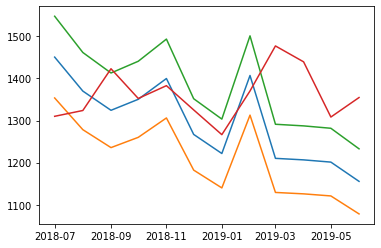

In [339]:
plt.plot(combineControlTrial_sales)

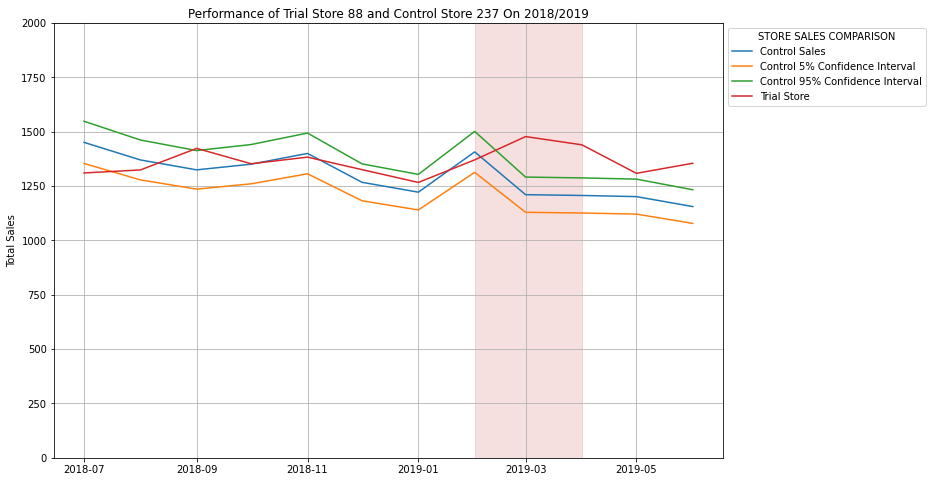

In [340]:
# plot the combined data
plt.figure(figsize = (12, 8))
plt.plot(combineControlTrial_sales)
  
# Set graph title and axis title
plt.title(f'Performance of Trial Store {trial_store} and Control Store {control_Store} On 2018/2019')
plt.ylabel('Total Sales')

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'],loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE SALES COMPARISON")

# Set new y-axis limit
plt.ylim((0, 2000))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = '#d65f5f', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

For total sales, we can see that the trial for 88 is significantly different compared to control store on the March and April  but not statistically different for February. Trial store performance lies outsidde 5% to 95%.

In [341]:
scaledControlCust,percentageDiff = concat_factor_customer(pretrial_metrics,"num_customer")

In [342]:
percentageDiff.head()

,YEARMONTH,ControlCustomers,TrialNumCust,percentageDiff
0,201807,127.276836,129,0.013539
1,201808,134.237288,131,0.024116
2,201809,125.288136,124,0.010281
3,201810,122.305085,123,0.005682
4,201811,131.254237,130,0.009556


In [343]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.00741024435207507

In [344]:
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), ['YEARMONTH','tValue']]

,YEARMONTH,tValue
7,201902,1.387456
8,201903,17.873693
9,201904,9.814423


In [345]:
# Find the 95th percentile of the t distribution with dof = 7
print(f"The 95th percentile of the t distribution {t.ppf(1-0.05, dof)}")

The 95th percentile of the t distribution 1.9431802803927816


In [346]:
controlCust = plot_scaled(scaledControlCust,"plotMONTH","ControlCustomers")
controlCust.rename(columns={"ControlCustomers": "Control Customers"},inplace=True)
controlCust

,Control Customers
plotMONTH,
2018-07-01,127.276836
2018-08-01,134.237288
2018-09-01,125.288136
2018-10-01,122.305085
2018-11-01,131.254237
2018-12-01,123.299435
2019-01-01,116.338983
2019-02-01,125.288136
2019-03-01,118.327684


In [347]:
trialCust = df_metrics.loc[df_metrics["STORE_NBR"]==trial_store]
trialCust = plot_scaled(trialCust,"plotMONTH","num_customer")
trialCust.rename(columns={"num_customer": "Trial Customers"},inplace=True)
trialCust

,Trial Customers
plotMONTH,
2018-07-01,129
2018-08-01,131
2018-09-01,124
2018-10-01,123
2018-11-01,130
2018-12-01,126
2019-01-01,117
2019-02-01,124
2019-03-01,134


In [348]:
controlCust['Control 5% Confidence Interval'] = controlCust['Control Customers'] * (1 - stdDev*2)
controlCust['Control 95% Confidence Interval'] = controlCust['Control Customers'] * (1 + stdDev*2)
controlCust

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval
plotMONTH,,,
2018-07-01,127.276836,125.390531,129.163141
2018-08-01,134.237288,132.247826,136.226750
2018-09-01,125.288136,123.431304,127.144967
2018-10-01,122.305085,120.492464,124.117706
2018-11-01,131.254237,129.308985,133.199489
2018-12-01,123.299435,121.472077,125.126793
2019-01-01,116.338983,114.614782,118.063184
2019-02-01,125.288136,123.431304,127.144967
2019-03-01,118.327684,116.574010,120.081358


In [349]:
combineCust = pd.merge(controlCust,trialCust,left_index = True, right_index = True)
combineCust

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Customers
plotMONTH,,,,
2018-07-01,127.276836,125.390531,129.163141,129
2018-08-01,134.237288,132.247826,136.226750,131
2018-09-01,125.288136,123.431304,127.144967,124
2018-10-01,122.305085,120.492464,124.117706,123
2018-11-01,131.254237,129.308985,133.199489,130
2018-12-01,123.299435,121.472077,125.126793,126
2019-01-01,116.338983,114.614782,118.063184,117
2019-02-01,125.288136,123.431304,127.144967,124
2019-03-01,118.327684,116.574010,120.081358,134


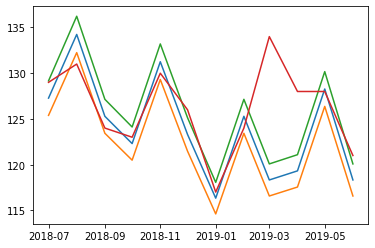

In [350]:
plt.plot(combineCust)

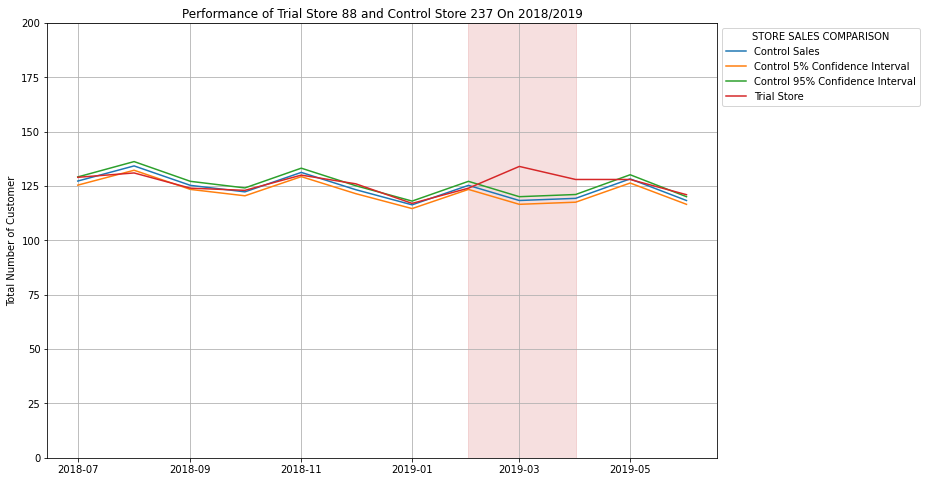

In [351]:
# plot the combined data
plt.figure(figsize = (12, 8))
plt.plot(combineCust)
  
# Set graph title and axis title
plt.title(f'Performance of Trial Store {trial_store} and Control Store {control_Store} On 2018/2019')
plt.ylabel('Total Number of Customer')

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'],loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE SALES COMPARISON")

# Set new y-axis limit
plt.ylim((0, 200))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = '#d65f5f', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

Total number of customers in the trial observation for trial store is statistically significant for march and april but not statistically different for February.

## Conclusion

Based on the exploratory data analysis depicted that trial stores 77 and 86 showed an significant difference at least 2 of three months of the trial period on increasing the number of customers. However the trial store 88 was not statistically significant based on the analysis of the data eventhough the number of customers is statistically significant. 